# <center> NMF based Faces Representation </center>

We will use the <b>ORL database</b>, available to anyone on <a href="http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html"> AT&T’s web site</a>. This database contains images showing the faces of 40 people. Each one of them was photographed 10 times. These photos are stored as images in grey levels with 112x92 pixels. In our example, we constructed a <b>catalog called orlfaces</b>, comprised of the catalogs named $s_1, s_2, . . . , s_{40}$, each one of them containing the 10 images we are going to process. The data has been split in two parts train and test. For each catalog we use the first 9 photos for training and the last photo for test.

To avoid too large values, the data matrix is divided by max value present in all the images. Indeed, this division does not have any major impact on performance of the Matrix Factorization methods. The data has been split in two-parts train and test. For each catalog we use the first 9 photographs for training and the last photograph for test. However, we only use the training part for this lab. The final data matrix shape is given 10304 (pixels) x 360 (faces)

In [11]:
import numpy as np
import PIL.Image as img
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (17.0, 5.0)
matplotlib.rcParams['font.size'] = 15

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


1- Load the training data?

In [ ]:
import orlfaces
trainData, trainlabels = orlfaces.loadDataTrain("orl_faces")
trainData = trainData / np.max(trainData[:])

2- Display image example?

In [195]:
B = np.array([-1,0,-2,1,2,3])
B = np.clip(B, a_min=0, a_max=None)
print(B)

[0 0 0 1 2 3]


In [ ]:
i = np.random.randint(trainData.shape[1])
print("trainData[:, ", i, "] : label : ",  trainlabels[i])
orlfaces.showFaces(trainData[:, i])
print(trainData.shape)

3- Create the NMF function? 

In [210]:
def NMF(V, RANK, MAX_ITER=50, LAMBDA=0.0001):
    # NMF - Non-negative matrix factorization
    # B, W, OBJ, NUM_ITER = NMF(V, RANK, MAX_ITER, LAMBDA)
    # V         : Input data.
    # RANK      : Rank size.
    # MAX_ITER  : Maximum number of iterations (default 50).
    # LAMBDA    : Convergence step size (default 0.0001). 
    # B         : Set of basis images.
    # W         : Set of basis coefficients.
    # OBJ       : Objective function output.
    # NUM_ITER  : Number of iterations run.

    # Create initial matrices random initialization
    # Make sure W has unit sum columns! (each column should sum to one).
    
    print(V.shape)
    W = np.random.rand(RANK, V.shape[1])
    W = np.apply_along_axis(lambda t : t/t.sum(), 0, W)
    #print(W.sum(axis=0))
    print(W.shape)
    B = np.random.rand(V.shape[0], RANK)
    print(B.shape)
   
  
    # Calculate initial objective
    OBJ = computeObjective(V, B, W)
    # Iterations
    NUM_ITER = 0
    for i in range(MAX_ITER):
        NUM_ITER += 1
        B = B*( ((V/(B@W)) @ W.T) / (np.ones( (1,W.T.shape[0]) ) @ W.T))
        B = np.clip(B, a_min=0, a_max=None)
        W = W*( (B.T @ (V/(B@W))) / (B.T @ np.ones( (B.T.shape[1],1) )))
        W = np.clip(W, a_min=0, a_max=None)

                   
        new_OBJ = computeObjective(V, B, W)
        print(np.abs(new_OBJ - OBJ))
        if np.abs(new_OBJ - OBJ) < LAMBDA:
            break
        OBJ = new_OBJ
        

    # Stop when the absolute value of the new objective function
    # value – old objective value is smaller or equal to Lambda or
    # the max number of iterations is yield.
    
    return B, W, OBJ, NUM_ITER

def computeObjective(V, B, W):
    obj = np.sum(np.sum(-V * np.log(np.abs(B @ W)) - (B @ W)))
    return obj

- As seen in the lecture for the KL divergence

    - Start iteration
    $$ B = B \otimes \frac{\left(\frac{V}{BW}\right)W^T}{\mathbb{1}W^T} $$
    $$ W = W \otimes \frac{B^T\left(\frac{V}{BW}\right)}{B^T\mathbb{1}} $$

The division is elements by element.

$\otimes$ The multiplication is elements by elements

4- Compute the NMF using this script?

(10304, 360)
(40, 360)
(10304, 40)
259481.28606605355
236.72736448573414
238.25750940095168
245.34130848984933
258.3094297532807
277.8264309699298
304.8111143116839
340.42798529024003
386.0630436707288
443.2685374079156
513.6565191479167
598.717139182263
699.5378109490848
816.4091786405188
948.330631173565
1092.478609975311
1243.7741542024887
1394.7622938328423
1536.0474345760304
1657.448368300451
1749.799364694336
1806.9779355872306
1827.463359025889
1814.7524920761352
1776.3706725580269
1721.8262165199849
1660.29757772811
1598.853675845312
1541.6414983004215
1490.0097007869044
1443.232913279673
1399.4401221114676
1356.4550962704234
1312.4055243869661
1266.070587945229
1216.9961346791824
1165.4306093088817
1112.1445128429914
1058.198919369548
1004.7220659177983
952.7358034487115
903.0504079611856
856.22482044145
812.5758793436107
772.2160261240788
735.1018442198401
701.0816834983416
669.9363644365221
641.4110437785857
615.2385926839779
591.1557758890558
568.9137189364992
548.284040203

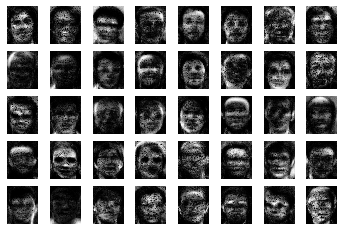

In [212]:
B, W, obj, k = NMF(trainData, 40, 100, 0.001)
print("Iteration", k)

for k in range(40):
    plt.subplot(5, 8, k + 1)
    orlfaces.showFaces(B[:, k]);

5- Compare your results to the NMF predefined function in python sklearn.decomposition.NMF?

In [ ]:
from sklearn.decomposition import NMF

model = NMF(n_components = 40, init='random', random_state=0, solver='mu', beta_loss='kullback-leibler', max_iter = 500)
#print(trainData.T)
W1 = model.fit_transform(trainData.T)
B1 = model.components_

(360, 40)
(40, 10304)


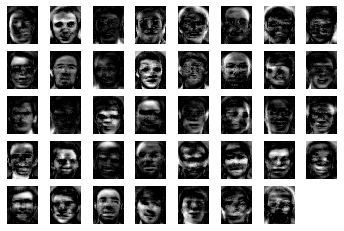

In [168]:
print(W1.shape)
print(B1.shape)

for k in range(1,40):
    plt.subplot(5, 8, k)
    orlfaces.showFaces(B1.T[:, k]);

6- Sparsity: Imposing sparsity to both B and W will generate the following updating rules.

$$ B = B \otimes \frac{\left(\frac{V}{BW}\right)W^T}{\mathbb{1}W^T + \beta} $$
$$ W = W \otimes \frac{B^T\left(\frac{V}{BW}\right)}{B^T\mathbb{1} + \alpha} $$

In [214]:
def ssnmf(V, RANK, MAX_ITER, LAMBDA, ALPHA, BETA): 
    # NMF - Non-negative matrix factorization
    # W, H, OBJ, NUM_ITER] = SSNMF(V,RANK,MAX_ITER,LAMBDA)
    # V - Input data.
    # RANK - Rank size.
    # MAX_ITER - Maximum number of iterations (default 50).
    # LAMBDA - Convergence step size (default 0.0001).
    # ALPHA - Sparse coefficient for W.
    # BETA - Sparse coefficient for B.
    # W - Set of basis images.
    # H - Set of basis coefficients.
    # OBJ - Objective function output.
    # NUM_ITER - Number of iterations run.
    
    W = np.random.rand(RANK, V.shape[1])
    W = np.apply_along_axis(lambda t : t/t.sum(), 0, W)
    #print(W.sum(axis=0))
    print(W.shape)
    B = np.random.rand(V.shape[0], RANK)
    print(B.shape)
   
  
    # Calculate initial objective
    OBJ = computeObjective(V, B, W)
    # Iterations
    NUM_ITER = 0
    for i in range(MAX_ITER):
        NUM_ITER += 1
        B = B*( ((V/(B@W)) @ W.T) / (np.ones( (1,W.T.shape[0]) ) @ W.T + BETA))
        B = np.clip(B, a_min=0, a_max=None)
        W = W*( (B.T @ (V/(B@W))) / (B.T @ np.ones( (B.T.shape[1],1) ) + ALPHA))
        W = np.clip(W, a_min=0, a_max=None)

                   
        new_OBJ = computeObjective(V, B, W)
        print(np.abs(new_OBJ - OBJ))
        if np.abs(new_OBJ - OBJ) < LAMBDA:
            break
        OBJ = new_OBJ
        

    # Stop when the absolute value of the new objective function
    # value – old objective value is smaller or equal to Lambda or
    # the max number of iterations is yield.
    
    return B, W, OBJ, NUM_ITER


The new objective function is

In [215]:
def compute_objective(V, W, B, alpha, beta):
    obj = np.sum(np.sum(-V * np.log(W @ B) - (W @ B))) + alpha * np.sum(np.sum(B))+ beta * np.sum(np.sum(W));
    return obj

7- Compute the sparse NMF for $\alpha=1$ and $\beta=100$? 

(40, 360)
(10304, 40)
272738.6222721025
7670.772224209737
7584.354849039111
7453.970882898371
7284.4295662868535
7078.060256474942
6837.096917102404
6563.786792392959
6260.319840256532
5928.7596491253935
5571.027594052372
5188.978924283234
4784.608232174651
4360.413392803806
3919.91910492396
3468.301607332134
3012.960890281771
2563.7758648472372
2132.713084170944
1732.539112796425
1374.6882137123612
1066.8099925380084
810.9166076151887
603.0239610247663
434.5944074400468
295.22397525503766
175.4331186126219
68.49332813528599
29.15594868984772
118.62825647549471
199.77987305406714
272.2427417758736
335.994795624516
391.4919200526201
439.552430857555
481.1797598460107
517.4235069517745
549.3002438078984
577.7572228354984
603.6569470019313
627.7691618785029
650.7658209683141
673.2192778281751
695.6049182720599
718.3086481685168
741.638593446929
765.8396825545933
791.1095550556201
817.6143460931489
845.5031907301163
874.9206507586641
906.0165892558289
938.9531926428317
973.9087057161378
10

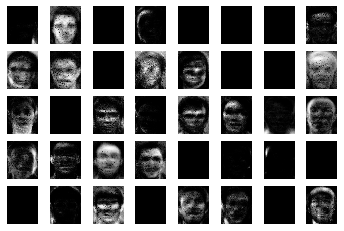

In [216]:
B, W, obj, k = ssnmf(trainData, 40, 100, 0.001, 1, 100)
print("Iteration", k)

for k in range(40):
    plt.subplot(5, 8, k + 1)
    orlfaces.showFaces(B[:, k]);